# Question 1
Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyper‐
parameters, such as kernel="linear" (with various values for the C hyperpara‐
meter) or kernel="rbf" (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?

In [34]:
# download data
import os
import tarfile
import urllib.request
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
Houshing_path=os.path.join("datasets","housing")
Houshing_url= DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_houshing_data(houshing_url=Houshing_url,houshing_path=Houshing_path):
    if not os.path.isdir(houshing_path):
        os.makedirs(houshing_path)
    tgz_path=os.path.join(houshing_path,"housing.tgz")
    urllib.request.urlretrieve(houshing_url,tgz_path)
    #convert rar to data
    houshing_tgz=tarfile.open(tgz_path)
    houshing_tgz.extractall(path=houshing_path)
    houshing_tgz.close()


In [35]:
#download file data
fetch_houshing_data()

In [36]:
#load data
import pandas as pd
def load_houshing_data(houshing_path=Houshing_path):
    csv_path=os.path.join(houshing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [38]:
# test data
housing =load_houshing_data()
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#information of frame data
housing.info()
# total bedroms have nan value, and ocean must convert to numeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# count the value if u want to convert !
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# data cleaning -> total_bedrooms 
housing["total_bedrooms"].fillna(housing["total_bedrooms"].mean(),inplace=True)

In [10]:
#cek the nan value
housing["total_bedrooms"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: total_bedrooms
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [11]:
# convert to numeric value from ocean_proximity 
from sklearn.preprocessing import OneHotEncoder
categorical_encoder = OneHotEncoder(sparse=False)#so lazy convert again from sparse matrix to array  
housing["ocean_proximity"]=categorical_encoder.fit_transform(housing[["ocean_proximity"]])


In [12]:
# cek the categorical value convert to numerical value on ocean_proximity
housing["ocean_proximity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: ocean_proximity
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [13]:
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0              0.0  
1      2401.0      1138.0         8.3014            358500.0              0.0  
2       496.0       177.0         7.2574            352100.0              0.0  
3       558.0       219.0         5.6431            341300.0              0.0  
4       565.0       259.0         3.8462            342200.0              0.0  


In [14]:
# split the data fitur and label
housing_prepared= housing.drop("median_house_value",axis=1)
housing_labels=housing["median_house_value"].copy()

In [15]:
print(housing_prepared)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean

In [16]:
print(housing_labels)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
# tuning hyperparameter with Grid_search 
param_grid=[
    {"kernel":["linear"], "C":[10.,30.,100.,300.,1000.,3000.,10000.,30000.]},
    {"kernel":["rbf"], "C":[1.0,3.0,10.,3.0,100.,300.,1000.,3000.,10000.,30000.],
     "gamma":[0.01,0.03,0.1,0.3,1.,3.,10.,30.]},
]
svm_reg = SVR()
grid_search=GridSearchCV(svm_reg,param_grid,scoring="neg_mean_squared_error",cv=5,verbose=2)
grid_search.fit(housing_prepared,housing_labels)
#best parameter by tuning
grid_search.best_params_
# {'C': 30000.0, 'kernel': 'linear'}

# question 2
make tuning hyperparameter with randomizedsearchcv

In [18]:
# use tuning hyperparamter with randomized search cv
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR
param_distribs={
    "kernel":["linear","rbf"],
    "C" : reciprocal(20, 200000),
    "gamma": expon(scale=1.0),    
}
svm_reg_2=SVR()
rnd_search=RandomizedSearchCV(svm_reg_2,param_distribs,n_iter=5,cv=3,scoring="neg_mean_squared_error",verbose=2,random_state=42)
rnd_search.fit(housing_prepared,housing_labels)
rnd_search.best_params_
# 'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [6]:
from scipy.stats import expon, reciprocal
expon_distrib=expon(scale=1.)
samples=expon_distrib.rvs(10000,random_state=42)#generate random variate from normal distributions
print(samples)


[0.46926809 3.01012143 1.31674569 ... 2.93196746 0.50664768 0.24480191]


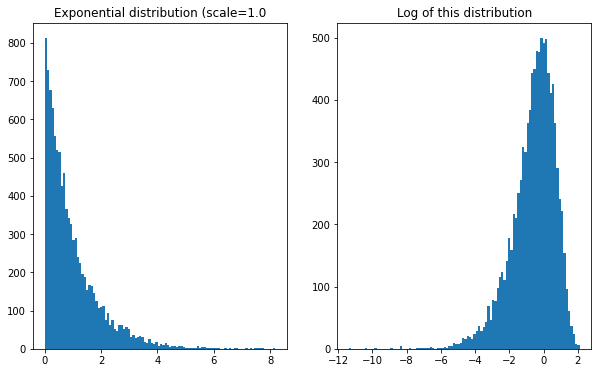

In [13]:
#visualisasi data
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0")
plt.hist(samples,bins=100)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples),bins=100)
plt.show()


so use log is get full expon distrbut with rvs but if use expon(scale=1.) then the result is 1/2 from distibut can got.

The distribution we used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

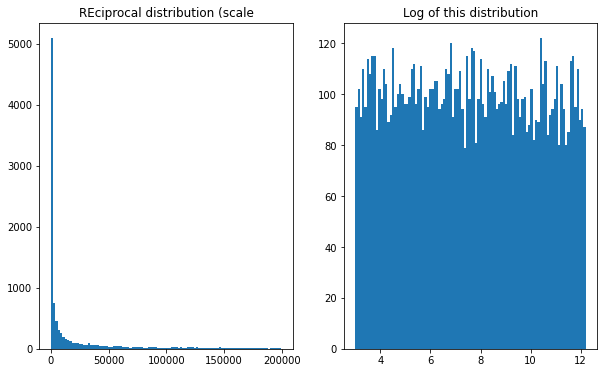

In [17]:
reciprocal_distrib=reciprocal(20,200000)
samples=reciprocal_distrib.rvs(10000,random_state=42)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title("REciprocal distribution (scale")
plt.hist(samples,bins=100)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples),bins=100)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

# Question 3
Try adding a transformer in the preparation pipeline to select only the most
important attributes.

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr,k):
    return np.sort(np.argpartition(np.array(arr), -k) [-k:])

class TopFeatureSelector(BaseEstimator,TransformerMixin):
    def __init__(self,feature_importance,k):
        self.feature_importances=feature_importances
        self.k=k
    def fit(self,X,y=None):
        self.feature_indices=indices_of_top_k(self.feature_importances,self.k)
        return self
    def transform(self,X):
        return X[:,self.feature_indices]


In [29]:
#define numbers of top features want to keep:
# feature_importances=rnd_search.best_estimator_.feature_importances_
feature_importances=[7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03]
k=5
top_k_feature_indices=indices_of_top_k(feature_importances,k)
top_k_feature_indices
atributes=['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND']


['longitude', 'latitude', 'median_income', 'pop_per_hhold', 'INLAND']

In [32]:
sorted(zip(feature_importances,atributes),reverse=True)[:k]

[(0.0733442355, 'longitude'),
 (0.0629090705, 'latitude'),
 (0.0411437985, 'median_income'),
 (0.0146726854, 'pop_per_hhold'),
 (0.0141064835, 'INLAND')]